In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./data/Top500DartsPlayers.csv')

In [4]:
df = df.rename({
    'Rank' : 'rank', 
    'Player' : 'name', 
    'Country' : 'country', 
    'Prize' : 'prize'
    }, axis=1)

In [5]:
df['prize'] = df['prize'].str.replace('£', '')
df['prize'] = df['prize'].str.replace(',', '')
df['prize'] = pd.to_numeric(df['prize'])

In [6]:
df

,rank,name,country,prize
0,1,Michael van Gerwen,Netherlands,8321167
1,2,Phil Taylor,England,7630816
2,3,Gary Anderson,Scotland,4118772
3,4,Raymond van Barneveld,Netherlands,3510128
4,5,Peter Wright,Scotland,3470888
...,...,...,...,...
495,496,Ben Robb,New Zealand,15339
496,497,Shane O Connor,Ireland,15325
497,498,Karin Krappen,Netherlands,15279
498,499,Ricky Williams,England,15276


In [7]:
df['cumulative'] = df['prize'].cumsum()

In [8]:
df['% of cumsum'] = df['cumulative']/np.max(df['cumulative'])

In [9]:
df['scaled prize'] = df['prize']/1_000_000

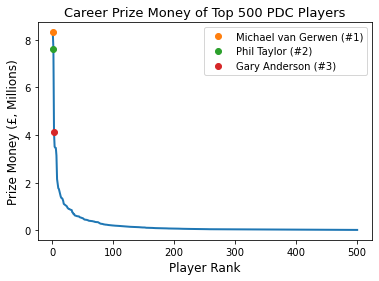

In [13]:
fig, ax = plt.subplots(1, 1)

ax.plot(df['rank'], df['scaled prize'], linewidth=2)
ax.plot([1], [8.321167], 'o', label='Michael van Gerwen (#1)')
ax.plot([2], [7.630816], 'o', label='Phil Taylor (#2)')
ax.plot([3], [4.118772], 'o', label='Gary Anderson (#3)')

ax.legend()
ax.set_title('Career Prize Money of Top 500 PDC Players', fontsize=13)
ax.set_xlabel('Player Rank', fontsize='larger')
ax.set_ylabel('Prize Money (£, Millions)', fontsize='larger')

plt.show()

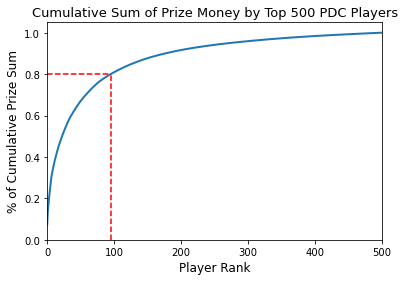

In [16]:
fig, ax = plt.subplots(1, 1)

ax.plot(df.index, df['% of cumsum'], linewidth=2)
ax.plot([96, 96], [0, .8005], '--r')
ax.plot([0, 96], [.8005, .8005], '--r')

# ax.set_xbound(0, 500)
# ax.set_ybound(0, 1.05)
ax.set_title('Cumulative Sum of Prize Money by Top 500 PDC Players', fontsize=13)
ax.set_xlabel('Player Rank', fontsize='larger')
ax.set_ylabel('% of Cumulative Prize Sum', fontsize='larger')

plt.show()